In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Churn_Modelling.csv")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
df.shape

(10000, 14)

In [5]:
is_exited = df["Exited"].value_counts()
print("Yes: ",is_exited[1])
print("No: ",is_exited[0])

Yes:  2037
No:  7963


In [6]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.duplicated().sum()

0

In [8]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
df.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

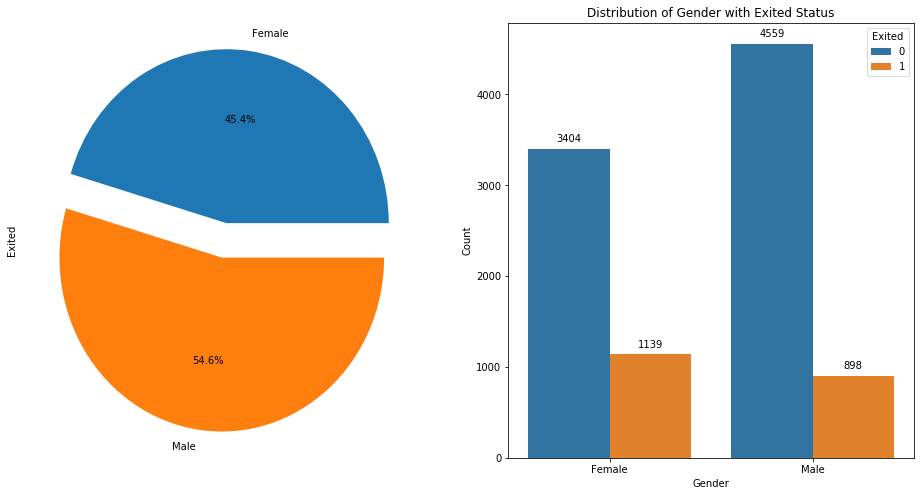

In [10]:
#Data Analysing
fig,axb = plt.subplots(ncols=2,nrows=1,figsize=(16, 8))

#Gender Distribution
explode = [0.1, 0.1]
df.groupby('Gender')['Exited'].count().plot.pie(explode=explode, autopct="%1.1f%%",ax=axb[0]);

ax = sns.countplot(x="Gender", hue="Exited", data=df,ax=axb[1])

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.title("Distribution of Gender with Exited Status")
plt.xlabel("Gender")
plt.ylabel("Count")

# Show the plot
plt.show()

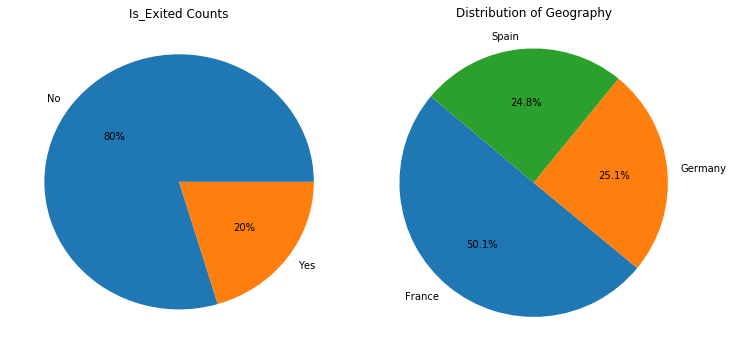

In [11]:
# Exited Counts Pie Chart
is_Exited = df["Exited"].value_counts()
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.pie(is_Exited, labels=["No", "Yes"], autopct="%0.0f%%")
plt.title("Is_Exited Counts")

# Distribution of Geography Pie Chart
plt.subplot(1, 2, 2)
geography_counts = df['Geography'].value_counts()
plt.pie(geography_counts, labels=geography_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal') 
plt.title('Distribution of Geography')

plt.tight_layout() 
plt.show()

In [12]:
#Data Cleaning
df = df.drop(['RowNumber', 'Surname', 'CustomerId'], axis= 1)
#preprocessing
df['Balance'] = df['Balance'].astype(int)
df['EstimatedSalary'] = df['EstimatedSalary'].astype(int)

le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
df['Geography'] = le.fit_transform(df['Geography'])

df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0,1,1,1,101348,1
1,608,2,0,41,1,83807,1,0,1,112542,0
2,502,0,0,42,8,159660,3,1,0,113931,1
3,699,0,0,39,1,0,2,0,0,93826,0
4,850,2,0,43,2,125510,1,1,1,79084,0


In [13]:
No_class = df[df["Exited"]==0]
yes_class = df[df["Exited"]==1]
s = pd.concat([yes_class, No_class], axis=0)

X = s.drop("Exited", axis=1)
y = s["Exited"]

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=65)

In [14]:
#Random Forest Classifier 
rf_model=RandomForestClassifier()
rf_model.fit(x_train,y_train)
y_pred = rf_model.predict(x_test)
print(classification_report(y_test, y_pred))
rf_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(rf_accuracy * 100))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91      1599
          1       0.71      0.41      0.52       401

avg / total       0.84      0.85      0.83      2000

Accuracy: 84.85%


In [15]:
#Logistic regression
lr_model = LogisticRegression()
lr_model.fit(x_train, y_train)
y_pred = lr_model.predict(x_test)
print(classification_report(y_test, y_pred))
lr_accuracy = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(lr_accuracy*100))

             precision    recall  f1-score   support

          0       0.81      0.98      0.88      1599
          1       0.41      0.07      0.12       401

avg / total       0.73      0.79      0.73      2000

Logistic Regression accuracy is: 79.35%


In [16]:
#Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

gb.fit(x_train, y_train)
y_pred = gb.predict(x_test)

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

# Calculate accuracy
gb_accuracy = accuracy_score(y_test, y_pred)
print('XGBoost model accuracy is: {:.2f}%'.format(gb_accuracy * 100))

Classification Report:
              precision    recall  f1-score   support

          0       0.87      0.96      0.92      1599
          1       0.76      0.44      0.56       401

avg / total       0.85      0.86      0.84      2000

XGBoost model accuracy is: 86.00%


In [17]:
#SVM
svm_model = LinearSVC()
svm_model.fit(x_train, y_train)
predict = svm_model.predict(x_test)
print(classification_report(y_test, predict))

svm_accuracy = accuracy_score(predict,y_test)
print('SVC model accuracy is: {:.2f}%'.format(svm_accuracy*100))

             precision    recall  f1-score   support

          0       0.80      1.00      0.89      1599
          1       0.00      0.00      0.00       401

avg / total       0.64      0.80      0.71      2000

SVC model accuracy is: 79.95%


C:\Users\SEC\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [18]:
#Comparing accuracies
Algorithms = ['Gradient Boosting', 'Random Forest','Logistic Regression', 'SVC']
accuracy = [gb_accuracy, rf_accuracy, lr_accuracy, svm_accuracy]
per_acc=[]
for i in accuracy:
    per_acc.append(i*100)
FinalResult=pd.DataFrame({'Accuracy':per_acc,'Algorithm':Algorithms})

FinalResult

,Accuracy,Algorithm
0,86.00,Gradient Boosting
1,84.85,Random Forest
2,79.35,Logistic Regression
3,79.95,SVC
